Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

For the Wine quality dataset there was no missing values as such.
1. Mean/Median Imputation:

- Advantages:
Simple and fast to implement.
Doesn't introduce significant bias into the dataset.
- Disadvantages:
May not be appropriate if the missing data is not missing completely at random (MCAR), as it assumes that the missing values have the same distribution as the observed values.
2. Mode Imputation:

- Advantages:
Suitable for categorical data.
Similar to mean/median imputation, it is simple and fast.
- Disadvantages:
Same limitations as mean/median imputation.
May not be ideal for imputing rare categories.

3. Regression Imputation:

- Advantages:
Utilizes relationships between variables to make more accurate imputations.
Can capture complex interactions in the data.
- Disadvantages:
Requires a predictive model, which can be computationally expensive.
Assumes a linear relationship between variables, which might not always be true.

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('datasets/stud.csv')

In [9]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = (df.total_score)/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

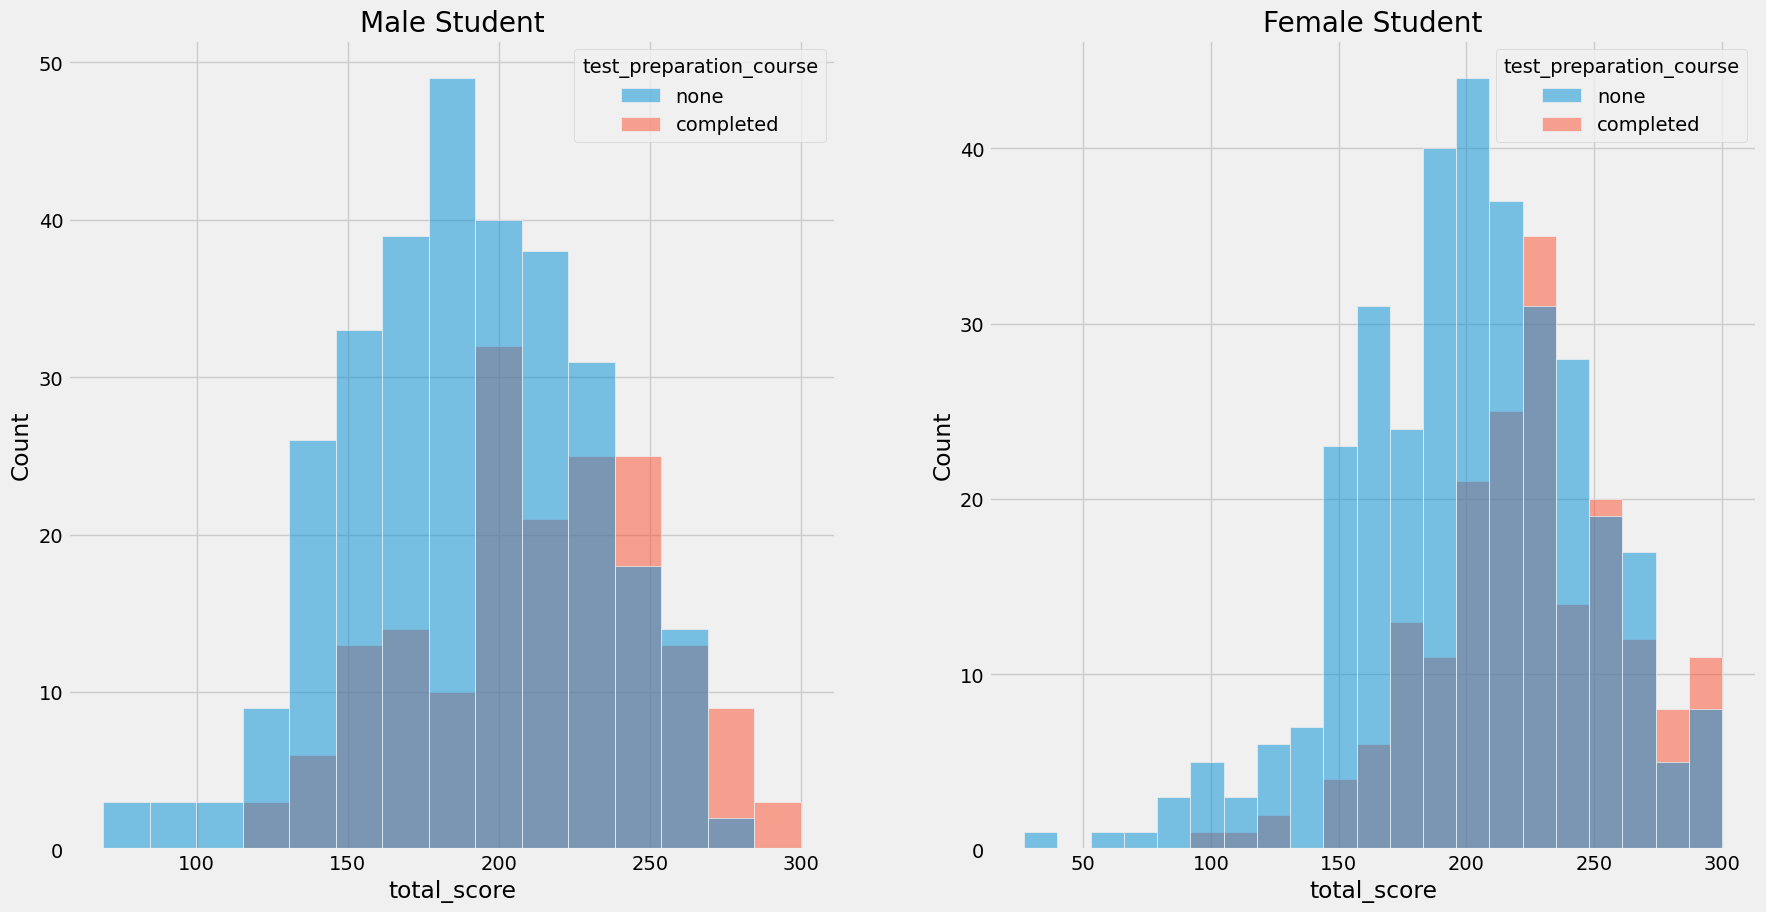

In [21]:
fig,axes = plt.subplots(1,2,figsize=(30,10))
plt.subplot(131)


plt.title('Male Student')
sns.histplot(data=df[df['gender']=='male'],x='total_score',hue='test_preparation_course')
plt.subplot(132)
plt.title('Female Student')
sns.histplot(data=df[df['gender']=='female'],x='total_score',hue='test_preparation_course')
plt.show()

## Insights:

- According to the visualization Female student who have completed the course are higher in number than the male student

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

In [22]:
df.sample(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
611,female,group C,some college,standard,none,58,59,66,183,61.000000
915,female,group E,some college,standard,none,68,70,66,204,68.000000
531,female,group C,some high school,standard,none,47,54,53,154,51.333333


#### Feature Engineering can be done on all Categorical Columns i.e., race_ethnicity, parental_level_of_education, lunch, test_preparation_course.

1. race_ethnicity - We can assign these category into numerical value like 0,1,2,3,4
2. parental_level_of_education - We can use Ordinal Encoding for this feature. Higher the degree higher the value for it.
3. Lunch - This feature has only 2 category so 0 and 1 will be sufficient. (0 for free, 1 for standard).
4. test_Preparation_course - Same two category 0 and 1 will be sufficient. (0 for none and 1 for completed).

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('datasets/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


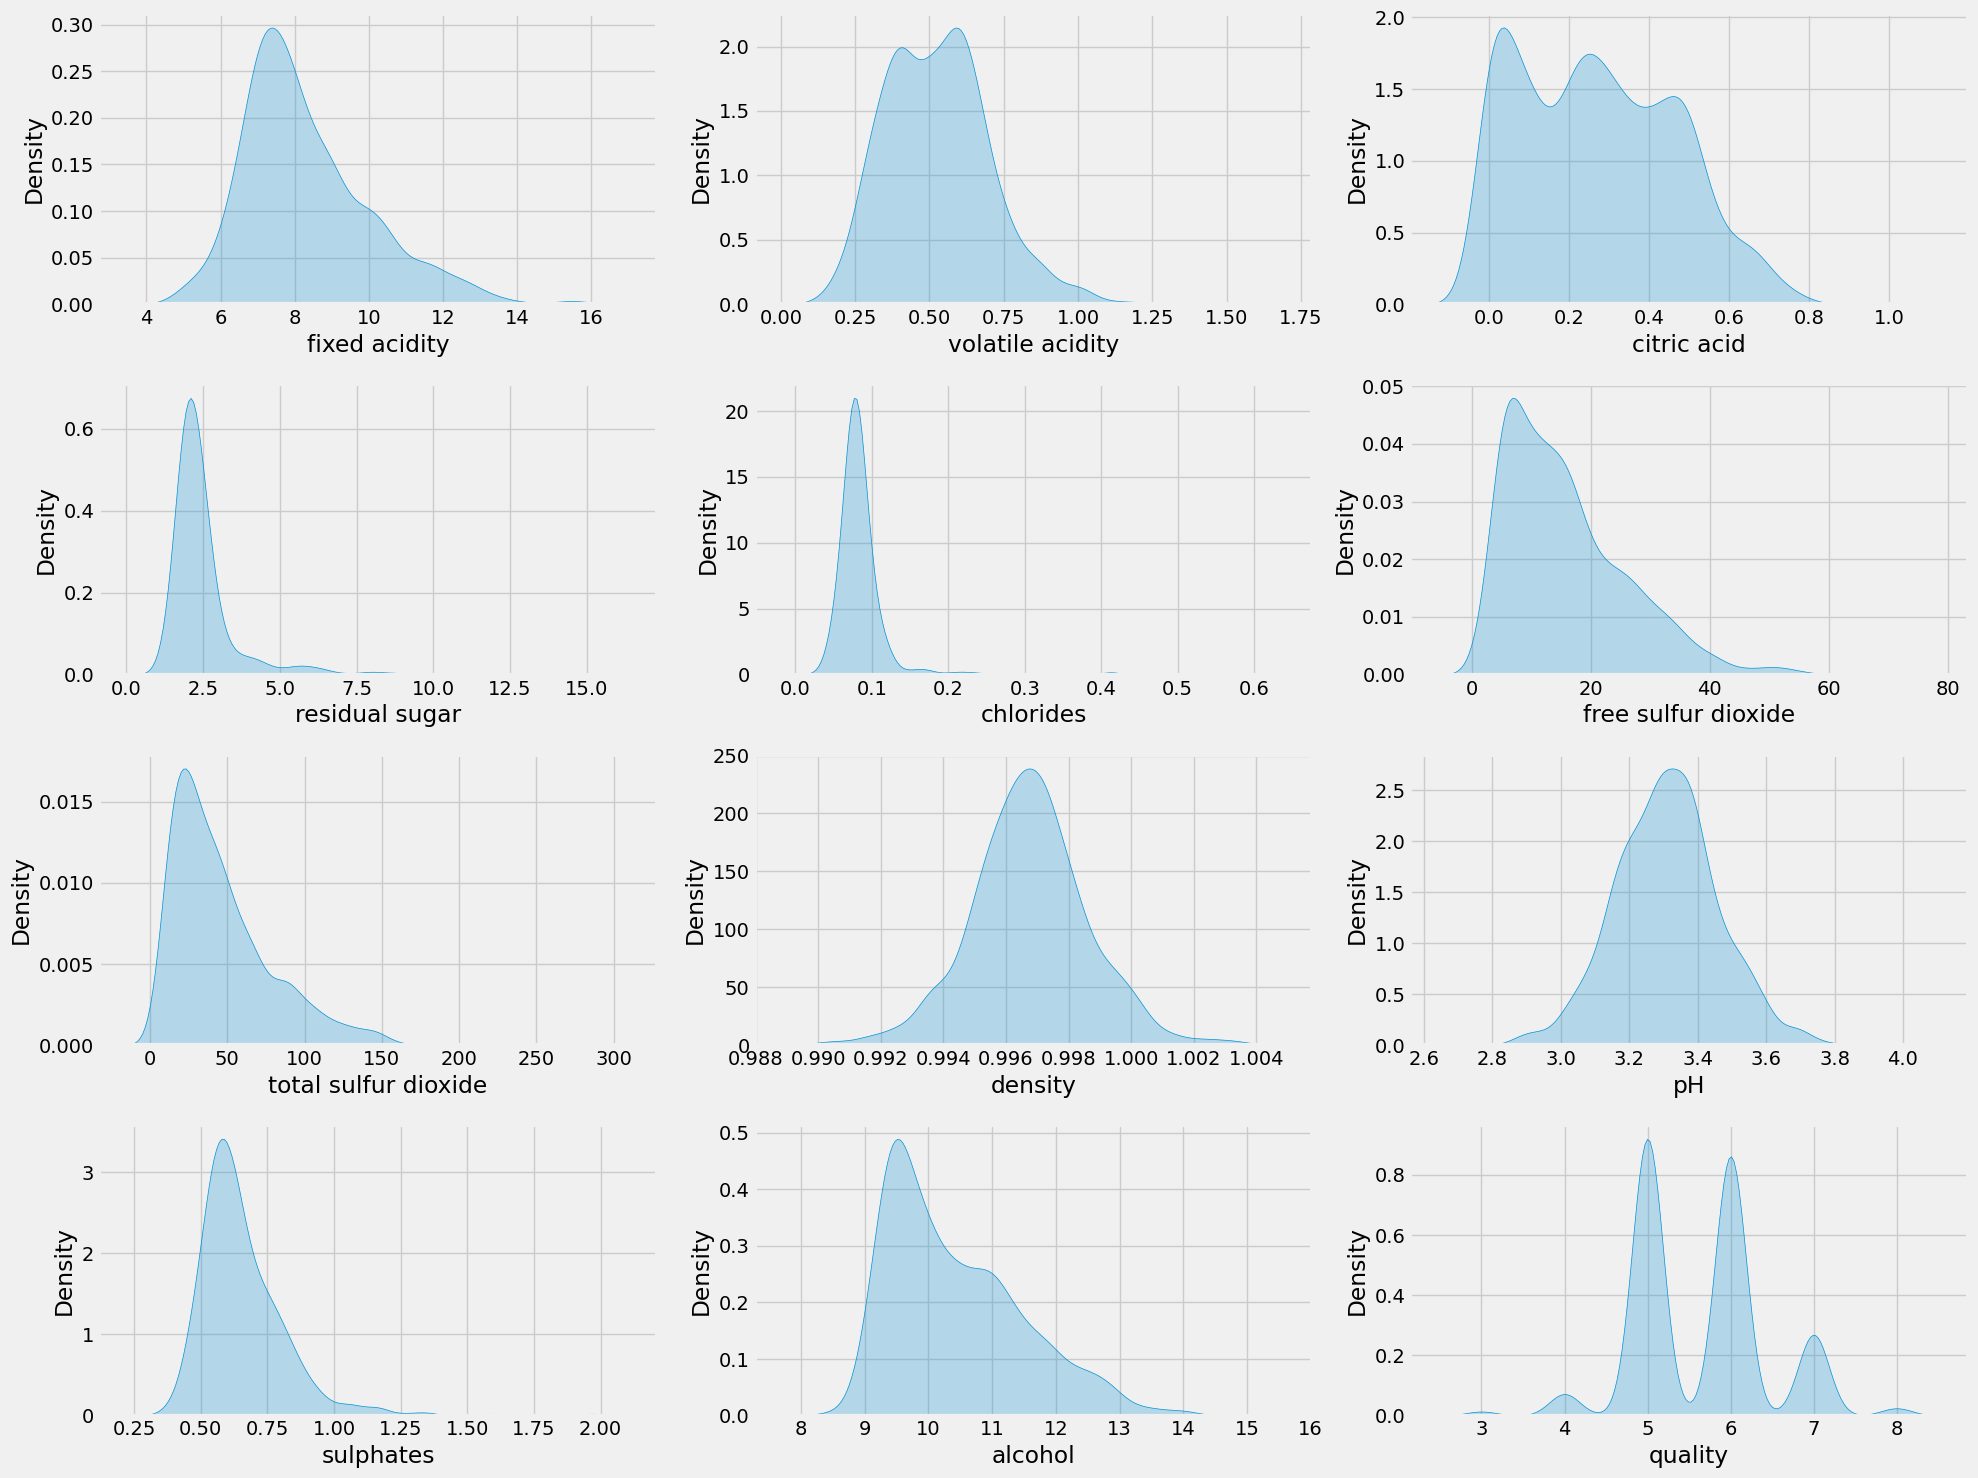

In [12]:
plt.figure(figsize=(20,15))
for i in range(0,len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True)      #Plotting all the graphs using kde (kernal density plot)
    plt.xlabel(df.columns[i])
    plt.tight_layout() 

## Insights:
  - Apart from `density` column all the other features are either left skewed or right skewed.

## Transformation to achieve to Normal Distribution:
1️⃣ Log Transformation:
  - Take the logarithm of the data to reduce skewness and achieve a more normal distribution.

2️⃣ Box-Cox Transformation:
  - Apply the Box-Cox transformation, which optimizes the power transformation to make the data more normally distributed.

3️⃣ Square Root Transformation:
  - Taking the square root of the data can often reduce skewness and approximate normality.

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?